In [8]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
from dataclasses import dataclass
from pathlib import Path

import pandas as pd
from dotenv import load_dotenv


@dataclass
class Config:
    project_dir: Path = Path("../../")
    model_dir: Path = project_dir / "models"
    outputs_dir: Path = project_dir / "outputs"
    data_dir: Path = project_dir / "data"
    raw_dir: Path = data_dir / "raw"
    interim_dir: Path = data_dir / "interim"
    processed_dir: Path = data_dir / "processed"


config = Config()
sys.path.append(str(config.project_dir.resolve()))
load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 1.18 ms, sys: 1.71 ms, total: 2.89 ms
Wall time: 2.55 ms


True

In [9]:
df_reviews = pd.read_csv(
    config.interim_dir
    / "olist_order_reviews_translated_label_review_categories_merged.csv",
)

df_orders = pd.read_csv(config.interim_dir / "olist_orders_customer_merged.csv")
df_item_products = pd.read_csv(
    config.interim_dir / "olist_item_product_seller_merged.csv"
)
df_orders_item_products_merged = pd.merge(
    df_orders, df_item_products, on="order_id", how="left"
)
assert (
    df_orders_item_products_merged["order_id"].nunique()
    == df_orders["order_id"].nunique()
)
df_orders_item_products_review_merged = pd.merge(
    df_orders_item_products_merged,
    df_reviews,
    on="order_id",
    how="left",
)
assert (
    df_orders_item_products_review_merged["order_id"].nunique()
    == df_orders_item_products_merged["order_id"].nunique()
)

In [10]:
print(f"df_reviews shape: {df_reviews.shape}")
print(f"review_id nunique: {df_reviews['review_id'].nunique()}")
print(f"order_id nunique: {df_reviews['order_id'].nunique()}")

df_reviews shape: (99224, 19)
review_id nunique: 98410
order_id nunique: 98673


In [11]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_en,review_comment_message_en,label_translated,label_score,meaningful_words,modified_review_score,review_categories,review_categories_str,review_categories_str_modified,review_creation_month,review_answer_month,review_answer_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2018-01,2018-01,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2018-03,2018-03,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2018-02,2018-02,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,NaN,I received it well before the stipulated deadl...,not_clear,0.578582,"['receive', 'stipulate', 'deadline']",5.0,['Delivery_Praise'],Delivery_Praise,Delivery_Praise,2017-04,2017-04,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,NaN,"Congratulations Lannister stores, I loved shop...",Positive,0.988321,"['congratulation', 'lannister', 'store', 'love...",5.0,['Shopping Experience_Praise'],Shopping Experience_Praise,Shopping Experience_Praise,2018-03,2018-03,2018-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2018-07,2018-07,2018-07-14
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2017-12,2017-12,2017-12-11
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,NaN,"Excellent backpack, super fast delivery. I hig...",Positive,0.987055,"['excellent', 'backpack', 'super', 'fast', 'de...",5.0,['Product Satisfaction_Praise'],Product Satisfaction_Praise,Product Satisfaction_Praise,2018-03,2018-03,2018-03-23
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2018-07,2018-07,2018-07-02


In [12]:
df_reviews[["review_id", "order_id"]].drop_duplicates().groupby("order_id")[
    "review_id"
].nunique().sort_values(ascending=False).head()

order_id
8e17072ec97ce29f0e1f111e598b0c85    3
c88b1d1b157a9999ce368f218a407141    3
03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
29062384ce4975f78aeba6a496510386    2
Name: review_id, dtype: int64

In [13]:
df_reviews.query("order_id == 'df56136b8031ecd28e200bb18e6ddb2e'")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_en,review_comment_message_en,label_translated,label_score,meaningful_words,modified_review_score,review_categories,review_categories_str,review_categories_str_modified,review_creation_month,review_answer_month,review_answer_date
2952,c444278834184f72b1484dfe47de7f97,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-08 00:00:00,2017-02-14 13:58:48,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2017-02,2017-02,2017-02-14
13982,72a1098d5b410ae50fbc0509d26daeb9,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-07 00:00:00,2017-02-10 10:46:09,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2017-02,2017-02,2017-02-10
62728,44f3e54834d23c5570c1d010824d4d59,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-09 00:00:00,2017-02-09 09:07:28,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2017-02,2017-02,2017-02-09


## レビューに関する基礎情報

### レビュースコアの分布

In [14]:
df_reviews["review_score"].value_counts().sort_index()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

### レビュー投稿回数分布

In [16]:
df_orders_item_products_review_merged[
    ["review_id", "customer_id"]
].drop_duplicates().groupby("review_id")["customer_id"].nunique().sort_values(
    ascending=False
).value_counts()

customer_id
1    97621
2      764
3       25
Name: count, dtype: int64

### レビュー投稿数推移

<Axes: xlabel='review_answer_date'>

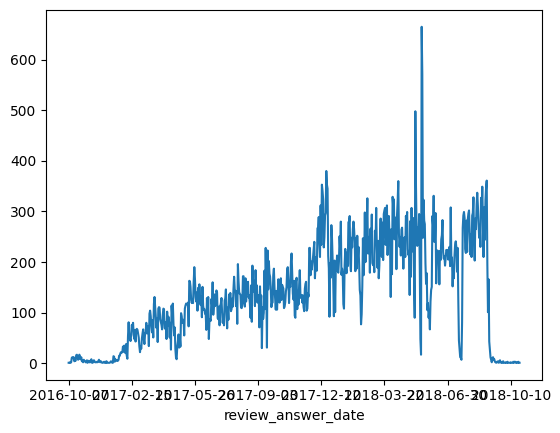

In [17]:
df_reviews[["review_id", "review_answer_date"]].drop_duplicates().groupby(
    "review_answer_date"
)["review_id"].nunique().plot()

### レビューが多い商品カテゴリ

In [18]:
df_orders_item_products_review_merged[
    [
        "order_id",
        "review_id",
        "review_answer_timestamp",
        "review_answer_timestamp",
        "review_comment_message_en",
    ]
].isna().sum()

order_id                         0
review_id                      961
review_answer_timestamp        961
review_answer_timestamp        961
review_comment_message_en    65946
dtype: int64

<Axes: ylabel='product_category_name_english'>

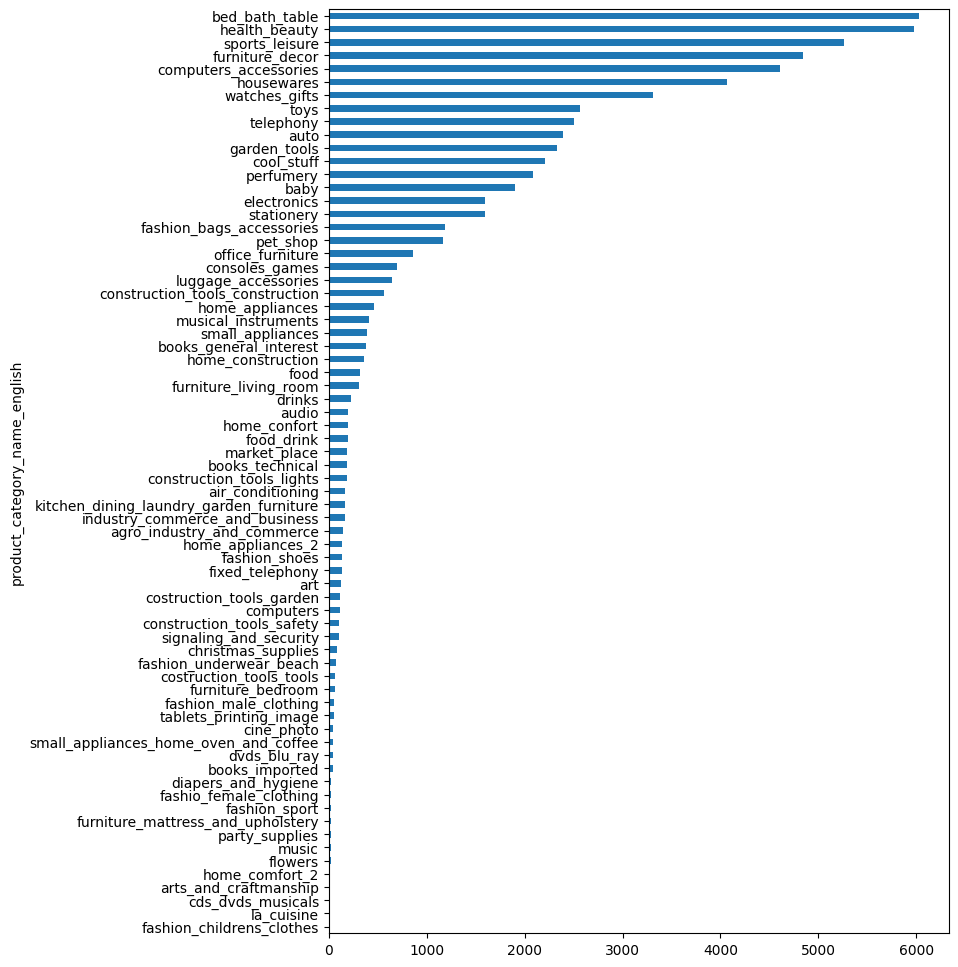

In [19]:
df_orders_item_products_review_merged[
    ["review_comment_message_en", "product_category_name_english"]
].query("review_comment_message_en.isna()")[
    "product_category_name_english"
].value_counts(ascending=True).plot(kind="barh", figsize=(8, 12))

<Axes: ylabel='product_category_name_english'>

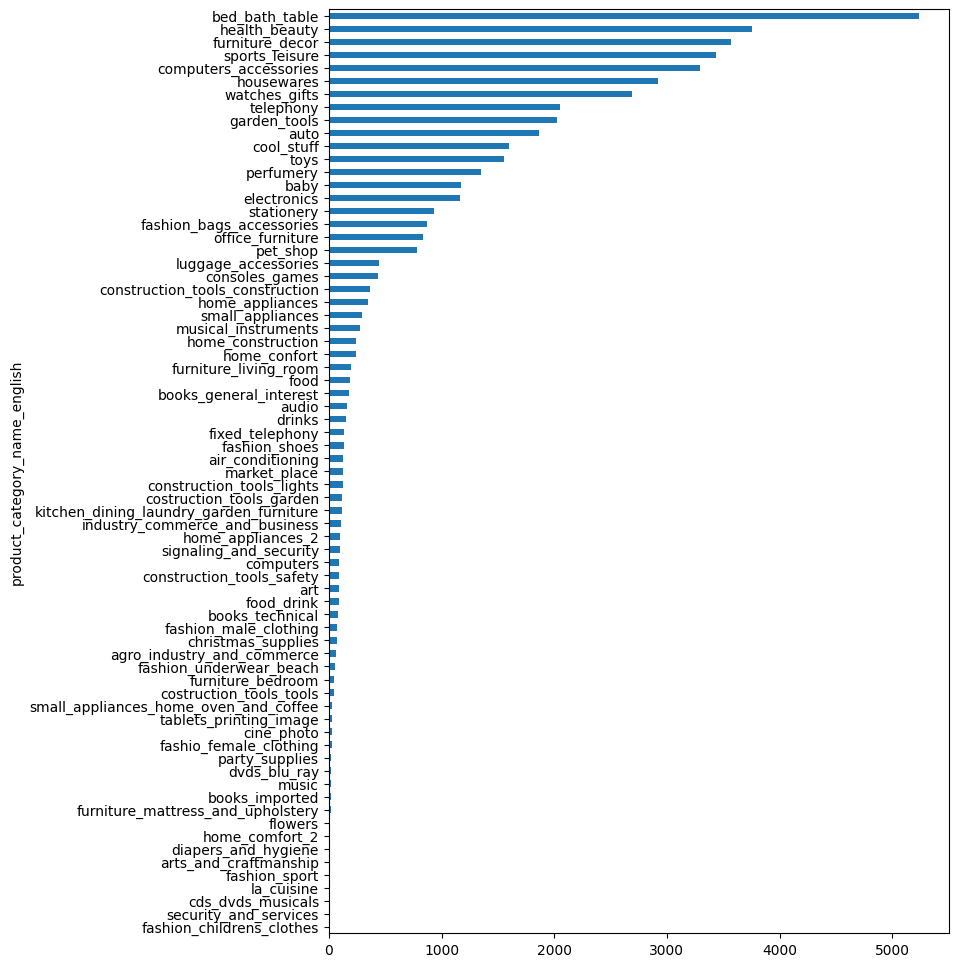

In [20]:
df_orders_item_products_review_merged[
    ["review_comment_message_en", "product_category_name_english"]
].query("~review_comment_message_en.isna()")[
    "product_category_name_english"
].value_counts(ascending=True).plot(kind="barh", figsize=(8, 12))